In [1]:
import numpy as np

import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, Flatten, Dense

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        height_shift_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        )

In [3]:
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(150,150),
        batch_size=32,
        color_mode="rgb",
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(150,150),
        color_mode="rgb",
        batch_size=32)

Found 3000 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

C:\Users\Vibhu\anaconda3\envs\myenv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Vibhu\anaconda3\envs\myenv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


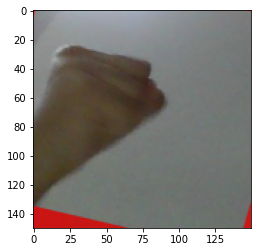

In [5]:

plt.imshow(train_generator[0][0][2])

In [6]:
height=28
width = 28
kernel_size = 5 # we
padding = int((kernel_size-1)/2)
stride=1

#output_after_1_convolution
out1=(height-kernel_size+(2*padding))/1 + 1 #=28

output_pool1 = out1/padding #=14


out2=(output_pool1-kernel_size+(2*padding))/1 + 1 #= 14

output_pool2 = out2/padding #=7

In [7]:
output_pool1


14.0

In [8]:
2000//32

62

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.regularizers import l2
model = Sequential([
                    Conv2D(32, 3, padding='same',  activation='relu',kernel_initializer='he_uniform', input_shape = [150, 150, 3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(128, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(3, activation = 'softmax'),
                    ])

In [18]:

model.compile(optimizer= Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit( train_generator, epochs = 200, validation_data = test_generator, 
                    callbacks = [early_stopping_cb], steps_per_epoch=3000// 32, verbose=2)


Epoch 1/200
93/93 - 89s - loss: 0.2880 - accuracy: 0.8999 - val_loss: 1.4421 - val_accuracy: 0.6344
Epoch 2/200
93/93 - 82s - loss: 0.1172 - accuracy: 0.9592 - val_loss: 0.3874 - val_accuracy: 0.8622
Epoch 3/200
93/93 - 83s - loss: 0.0448 - accuracy: 0.9845 - val_loss: 1.3446 - val_accuracy: 0.7278
Epoch 4/200
93/93 - 81s - loss: 0.0629 - accuracy: 0.9801 - val_loss: 1.1085 - val_accuracy: 0.6644
Epoch 5/200
93/93 - 80s - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.7049 - val_accuracy: 0.7811
Epoch 6/200
93/93 - 87s - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.4326 - val_accuracy: 0.8467
Epoch 7/200
93/93 - 82s - loss: 0.0380 - accuracy: 0.9896 - val_loss: 0.3338 - val_accuracy: 0.8956
Epoch 8/200
93/93 - 84s - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.5643 - val_accuracy: 0.8044
Epoch 9/200
93/93 - 76s - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.4974 - val_accuracy: 0.8667
Epoch 10/200
93/93 - 76s - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.7494 - val_accuracy: 0.7911

In [33]:
model.save("final.h5")

In [19]:
model.evaluate_generator(train_generator,steps=20)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[7.407427619909868e-05, 1.0]

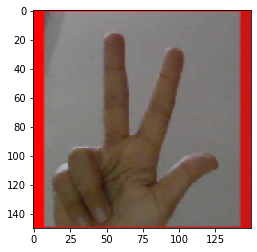

In [29]:
test_image=test_generator[0][0][31]
plt.imshow(test_image)


In [30]:
test_image=np.expand_dims(test_image, axis=0)

In [31]:
outputs=model.predict(test_image)

output=outputs.argmax()
print(outputs)

[[1.7584337e-06 7.2280377e-09 9.9999821e-01]]


In [32]:
import pandas as pd
outputs=model.predict(test_image)
output=outputs.argmax()
pred_dict=pd.DataFrame.from_dict(train_generator.class_indices.items()).rename(columns={0:'type',1:'label'})
print("prediction:")
print(pred_dict[pred_dict['label']==output]['type'])

if output==int(pred_dict[pred_dict['label']==output]['label']):
    print("correct pred!")
else:
    print('better luck nekk time')

prediction:
2    scissors
Name: type, dtype: object
correct pred!


In [ ]:
model.save_weights('model.h5')

with open("model.json", "w") as json_file:
    json_file.write(model.to_json())